# 2. Random Sample Imputation

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df['Age'].isnull().sum()

177

In [13]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [15]:
def impute_nan(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_Random"]=df[variable]
    # it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # Pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_Random"]=random_sample

In [16]:
median=df.Age.median()

In [17]:
median

28.0

In [18]:
impute_nan(df, 'Age', median)

In [44]:
df.head(20)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

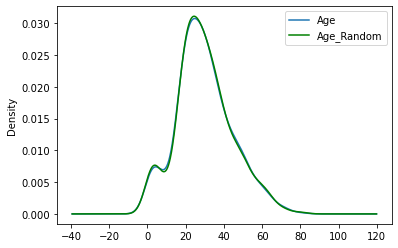

In [21]:
fig= plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df['Age_median'].plot(kind='kde', ax=ax, color= 'red')
df['Age_Random'].plot(kind='kde', ax=ax, color= 'green')
lines, lables=ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')

In [45]:
### Advantages
#1. Easy to implement
#2.There is less distorsion in variance

### Disadvantages
#1.In every situation the randomness wont work


# 3.Capturing NAN values with a new feature

In [46]:
# this works perfectly at MNAR (Missing data Not yet random)

In [47]:
df=pd.read_csv('titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
import numpy as np
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [49]:
df.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [58]:
## Advantages
#1. Easy to implement
#2. Captures the importance of the missing values


### Disadvantages
#1. Creating additional features(curse of dimentionality)


# 4. End of distribution imputation

In [71]:
df=pd.read_csv('titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


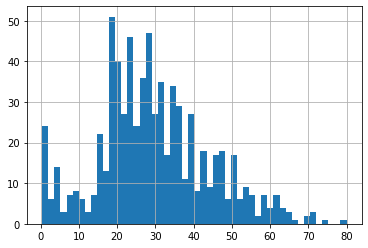

In [72]:
df.Age.hist(bins=50)

In [73]:
extreme=df.Age.mean()+3*df.Age.std()

In [81]:
extreme

73.27860964406095

In [74]:
import seaborn as sns

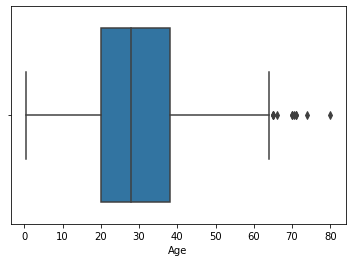

In [75]:
sns.boxplot('Age', data=df)

In [76]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_Endof_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace= True)

In [77]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [83]:
df.head(20)

,Survived,Age,Fare,Age_Endof_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


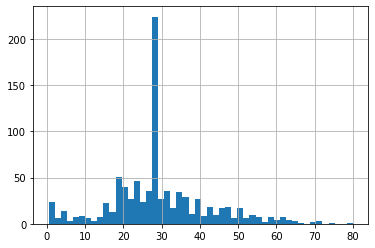

In [79]:
df.Age.hist(bins=50)

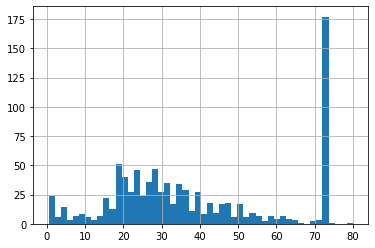

In [80]:
df.Age_Endof_distribution.hist(bins=50)

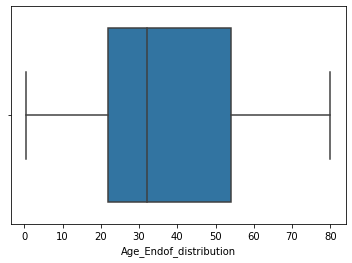

In [82]:
sns.boxplot('Age_Endof_distribution', data=df)

# Advantages

In [1]:
# 1.Easy to implement
# 2.Capture the importance of missing ness if there is one.

# Disadvantages

In [2]:
# 1. distorts the original distribution of value
# 2. If missingness is not important, it may mask the predictive power of the orginal value by distorting its distribution
# 3. If the number of NA is big, it will mask the true outliers in the distribution.
# 4. If the number of NA is small, the replaced NA may be considered an outlier and pre processed in a subsequent feature engineering.
